# Parking Authority Metered Areas

In [2]:
import pandas as pd

data = pd.read_csv("metered_parking_areas.csv")

In [3]:
data_sorted = data.sort_values(["rates", "parkinglen"], ascending = [True, True])
data_sorted[["area", "rates", "parkinglen"]]

,area,rates,parkinglen
3,Mount Washington,$1.00,10 Hours
19,Allentown,$1.00,2 Hours
20,West End,$1.00,2 Hours
22,Knoxville,$1.00,2 Hours
24,Carrick,$1.00,2 Hours
0,North Side,$1.50,10 Hours
4,South Side,$1.50,10 Hours
5,Uptown,$1.50,10 Hours
6,Brookline,$1.50,10 Hours
8,Shadyside,$1.50,10 Hours


In [4]:
# Copy of data to make transformations to the data
copy_of_data = data.copy()

# Initialize empty lists to hold new float values
new_rates = []
new_parkinglen = []

# iterate through each row in the data, converting each string to float from the rates, and parkinglen columns
for index, row in copy_of_data.iterrows():
    # store each string in the rates column
    rate = row["rates"]
    # if the column contains the string then a new float will be used
    if rate == "Dynamic":
        new_rate = 2.0
    # if string is not "Dynamic" then split the string and only take the number part
    else:
        new_rate = float(rate.split("$")[1])
    # add the new values to the empty list
    new_rates.append(new_rate)

    # store the current rows parking length
    parking = row["parkinglen"]
    # if the current rows string is "Unlimited" then replace with float
    if parking == "Unlimited":
        new_parking = 24.0
    # split the string and only take the number, convert into float
    else:
        new_parking = float(parking.split()[0])
    # add the new values to the empty parkinglen list
    new_parkinglen.append(new_parking)

# set the old string rates to the new list with the floats
copy_of_data["rates"] = new_rates
copy_of_data["parkinglen"] = new_parkinglen

# now math operations can be performed since they are now floats, parking score to determine the best parking area
copy_of_data["parkingScore"] = copy_of_data["parkinglen"] / copy_of_data["rates"]
sort_parkingScore = copy_of_data.sort_values("parkingScore", ascending = False)
sort_parkingScore[["area", "parkinglen", "rates", "parkingScore"]]


,area,parkinglen,rates,parkingScore
23,Bakery Square,24.0,2.0,12.000000
3,Mount Washington,10.0,1.0,10.000000
1,North Shore,24.0,3.0,8.000000
9,Oakland,24.0,3.0,8.000000
0,North Side,10.0,1.5,6.666667
8,Shadyside,10.0,1.5,6.666667
6,Brookline,10.0,1.5,6.666667
4,South Side,10.0,1.5,6.666667
5,Uptown,10.0,1.5,6.666667
14,Bloomfield,10.0,1.5,6.666667


### Parking Score

- From this sorted data above based on the highest parking score, it is easy to tell that Bakery Square has the highest parking score with a rate of $2 and max parking length of 24 hours.

## Parking Score Bar Chart

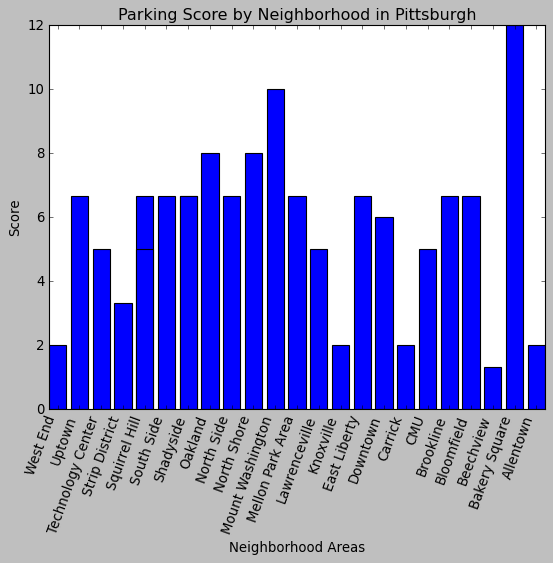

In [51]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

areas_parkingScore = copy_of_data.sort_values(["area", "parkingScore"], ascending = False)
plt.bar(areas_parkingScore["area"], areas_parkingScore["parkingScore"])
plt.title("Parking Score by Neighborhood in Pittsburgh")
plt.xlabel("Neighborhood Areas")
plt.ylabel("Score")
plt.style.use("fast")
plt.xticks(rotation = 70, ha = "right");

### How I Measured Best Parking

- By using the two main points that people consider when parking at metered areas, parking time limit and the cost. Comparing these was difficult since some areas had a low price but short time limit, there was a tradeoff. Low prices don't automatically mean that its better even if the time is short.
- To include both points fairly I used a parking score. By dividing the parking time limit by the cost per hour. The higher the score the better the parking in that area is.

### Best Parking Neighborhood

- The neighborhood with the highest parking score is Bakery Square, shown by the bar graph above. You can easily tell by the graph the neighborhood with the highest score. Meaning the neighborhood has good cost and time limit.

### Conclusion

- In conclusion, after the data-driven determination of "best neighborhood" my personal favorite neighborhood did not have the best parking score. As my personal favorite was not backed by real data. This project helped me realize how important it is to be able to use real world data to support your idea of something. Giving a more fact based answer than a guess or opinion. 